In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import kmeans, vq
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## Carga de datos

In [348]:
data= pd.read_csv('ks-projects-extended.csv', delimiter=';')

In [3]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient
0,1276758370,Representante de Jugadores,Mobile Games,Games,EUR,2016-05-04 00:00:00,6000.0,2016-04-04 17:50:05,2.0,failed,2.0,ES,0.856671
1,720658440,Manic Expression,Indie Rock,Music,USD,2014-11-03 00:00:00,15000.0,2014-10-05 16:38:53,16810.0,successful,89.0,US,1.168227
2,1515077474,IMPULSION Watches: Where innovation meets time,Product Design,Design,CAD,2017-10-18 00:00:00,35000.0,2017-09-13 18:50:37,2146.0,failed,14.0,CA,0.944026
3,562858107,Let's take back the music industry!,Jazz,Music,USD,2010-03-05 00:00:00,5000.0,2010-01-05 22:53:18,25.0,failed,1.0,US,0.507137
4,619208385,8 to 5 Cable: a comedy webseries (Canceled),Webseries,Film & Video,USD,2012-10-05 00:00:00,5800.0,2012-09-05 23:23:46,0.0,canceled,0.0,US,0.716406


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381050 entries, 0 to 381049
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    381050 non-null  int64  
 1   name                  381046 non-null  object 
 2   category              381050 non-null  object 
 3   main_category         381050 non-null  object 
 4   currency              381050 non-null  object 
 5   deadline              381050 non-null  object 
 6   goal                  343978 non-null  float64
 7   launched              381050 non-null  object 
 8   pledged               369664 non-null  float64
 9   state                 381050 non-null  object 
 10  backers               354159 non-null  float64
 11  country               381050 non-null  object 
 12  virality_coefficient  354159 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 37.8+ MB


## Transformación de la variable fecha

In [349]:
data['deadline'] = pd.to_datetime(data['deadline'])

In [350]:
data['launched'] = pd.to_datetime(data['launched'])

## Duplicados

In [351]:
# Examinamos los casos duplicados
data.iloc[:,0:12][data.iloc[:,0:12].duplicated(keep='first')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
10131,1650423417,Poppsy Cole Vol 2,Music,Music,USD,2016-09-30,1000.0,2016-08-31 02:06:03,1046.00,successful,11.0,US
12117,312989212,"""You're Mine"" Music Video",Film & Video,Film & Video,USD,2013-03-06,2000.0,2013-02-14 21:20:35,0.00,failed,0.0,US
13964,86611599,The Chocolate Lab,Farms,Food,USD,2015-04-16,1750000.0,2015-03-06 04:23:07,700.00,failed,8.0,US
18025,1479929168,I'm Making a New Record!,Country & Folk,Music,USD,2013-12-19,8000.0,2013-11-21 15:41:27,9167.11,successful,264.0,US
20266,1459915383,Lost Pet Rescue - Australia Online,Web,Technology,AUD,2016-03-19,1500.0,2016-02-19 00:22:58,308.00,failed,10.0,AU
...,...,...,...,...,...,...,...,...,...,...,...,...
380741,26353329,Producing / recording a song with a top Nashvi...,Music,Music,USD,2013-05-09,800.0,2013-04-10 19:04:06,1350.50,successful,27.0,US
380754,1066961076,Fiddlin'-Old Time and Bluegrass Music Documentary,Documentary,Film & Video,USD,2016-09-12,15000.0,2016-07-26 19:42:06,23327.00,successful,106.0,US
380795,1466118435,The Red Queen of Oz - Graphic Novel Project (I...,Comics,Comics,USD,2012-09-15,7000.0,2012-08-16 23:47:38,4405.00,failed,72.0,US
380831,2134491382,Dashon Burton and Logan Coale: First Duo Recor...,Classical Music,Music,USD,2013-08-15,7500.0,2013-07-16 01:08:18,8644.87,successful,199.0,US


In [352]:
#data.drop_duplicates(inplace=True)
data.drop_duplicates(subset=data.columns.difference(['virality_coefficient']), inplace=True)

#### ID duplicado

Observamos que varios de los ID están duplicados, por lo tanto como no tenemos forma de validarlos, consideramos eliminarlos todos

In [353]:
data[data.duplicated('ID', keep= 'first')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient
52673,2147476223,Dont Know These Demons Got Against Me Music Vi...,Hip-Hop,Music,USD,2012-10-01,4000.0,2012-08-17 20:09:37,5.00,failed,1.0,US,0.515989
53071,5935,Roos,Indie Rock,Music,USD,2012-01-07,8000.0,2011-11-08 05:48:35,840.00,failed,8.0,US,0.813778
60671,5926,Competition,Fashion,Fashion,USD,2013-06-13,4000.0,2013-05-14 01:18:54,4005.00,successful,14.0,US,0.927968
63046,5904,Student Operated Fabrication Lab,Video Games,Games,CAD,2014-10-06,3400.0,2014-08-07 13:24:34,40.00,failed,2.0,GB,0.834327
63133,5970,Circus Program,Immersive,Theater,USD,2017-03-13,4000.0,2017-02-14 17:33:33,4536.00,successful,43.0,US,1.128854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369612,5901,Monarch Espresso Bar,Theater,Theater,CAD,2014-10-06,3400.0,2014-08-07 13:24:34,326.00,failed,4.0,US,1.026300
373923,2147476254,blank,Film & Video,Film & Video,USD,2013-10-22,20000.0,2013-09-22 19:32:46,2265.00,canceled,63.0,US,0.871485
374465,5952,Charlie’s Brown: The Ultimate Brownie Experience™,Food,Food,USD,2013-10-07,10000.0,2013-09-07 21:00:24,12172.00,successful,199.0,US,1.297714
376484,5903,Seas of Iron,Theater,Theater,GBP,2014-10-06,3400.0,2014-08-07 13:24:34,8739.01,successful,145.0,DE,1.049379


In [354]:
data.drop_duplicates('ID', inplace=True)

In [355]:
data.reset_index(drop=True, inplace=True)

## Revisando el dataset

In [12]:
data.describe()

,ID,goal,pledged,backers,virality_coefficient
count,3.787700e+05,3.419070e+05,3.674500e+05,352021.000000,352021.000000
mean,1.074637e+09,4.895076e+04,9.731861e+03,105.960428,0.930643
std,6.192652e+08,1.179673e+06,9.661371e+04,912.365635,1.191058
min,5.900000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000
25%,5.380068e+08,2.000000e+03,3.000000e+01,2.000000,0.716406
50%,1.075172e+09,5.200000e+03,6.218400e+02,12.000000,0.881500
75%,1.610202e+09,1.600000e+04,4.079000e+03,56.000000,1.068416
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,449.928043


Puede observarse como todas las variables graficadas contienen outliers muy extremos que desvirtuan la distribución de las mismas.

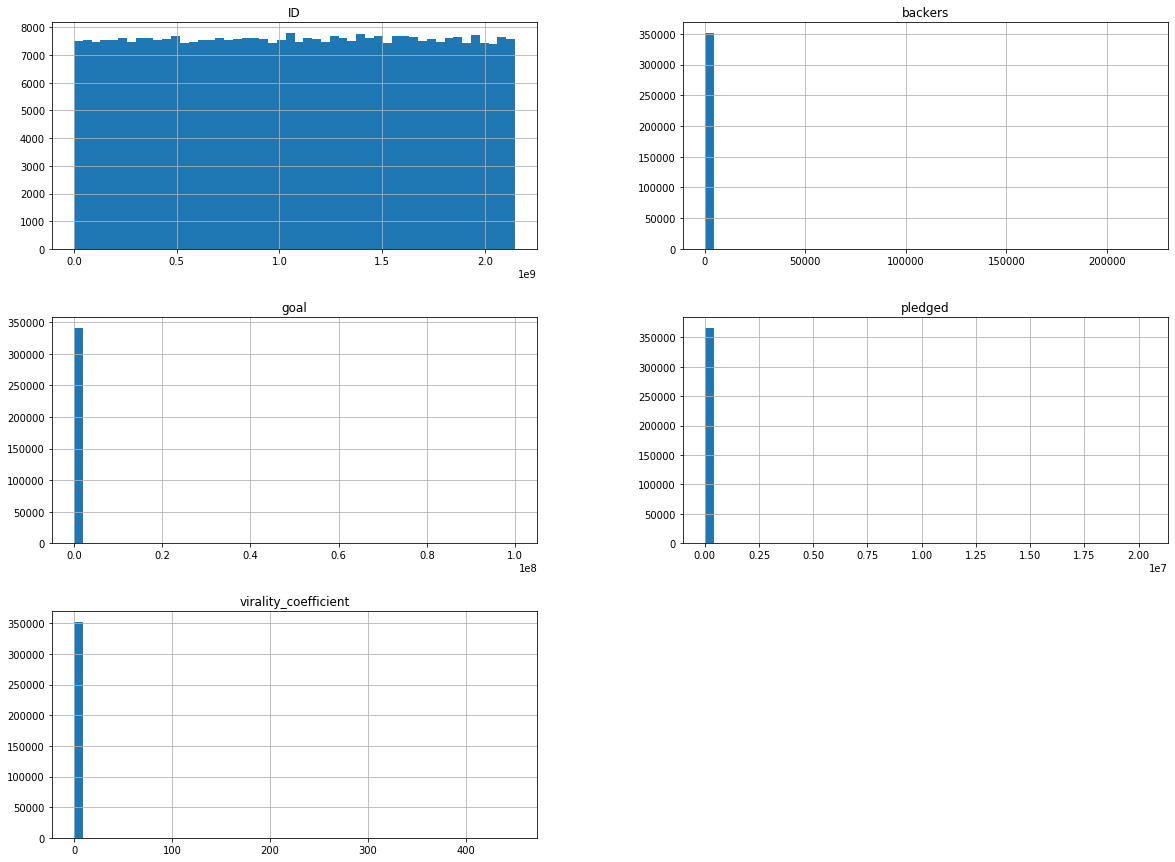

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

La variable 'backers' presenta la gran mayoría de sus valores a la izquierda, es decir, se trata de una variable con valores relativamente pequeños como vemos en sus análisis estadístico donde el 75% de sus valores se concentran hasta 56. Se trata de una variable que presenta valores muy extremos con su maximo en 219382.00 que analizaremos posteriormente. 
El mismo razonamiento se aplica a las variables 'goal' , 'pledged'.  y 'virality coeffcicient' que tambien muestran una distribución con valores muy extremos.



## Unimos Datasets

In [356]:
currency_dataset = pd.read_csv("exchange_rate.csv",  
                delimiter=':',
                  names=['currency', "exchange_rate"])

In [357]:
dataset_joined= pd.merge(data,currency_dataset,on='currency',how='left')

#### Transformamos las variables 'goal' y ' pledged' a euros

In [358]:
dataset_joined['goal'] = dataset_joined['goal'] * dataset_joined['exchange_rate']

In [359]:
dataset_joined['pledged'] = dataset_joined['pledged'] * dataset_joined['exchange_rate']

#### Borramos registros anteriores a 2009

In [360]:
dataset_joined['year'] = pd.DatetimeIndex(dataset_joined['launched']).year

In [361]:
sorted(dataset_joined['year'])

[1970,
 1970,
 1970,
 1970,
 1970,
 1970,
 1970,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,
 2009,

In [362]:
dataset_joined.drop( dataset_joined[dataset_joined['year']< 2009 ].index, inplace=True)

Borramos la columna 'year' puesto que ya no se necesita.

In [363]:
del dataset_joined['year']

## Analisis variables

Al analizar las variables 'pledged_EUR' y 'backers' vemos que existe cierta correlación positiva ya que a medida que aumenta el número de backers aumenta también la cantidad invertida en el proyecto. 
Tambien se observan ciertos valores muy dispersos que podrían ser outliers.

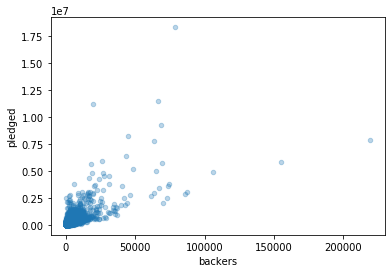

In [364]:
dataset_joined.plot(kind='scatter', x='backers', y='pledged', alpha=0.3)

En el caso de las variables 'backers' y 'virality_coefficient' vemos que no existe una relación entre ellas.
Además se bserva la presencia de posibles outliers en ambas variables.

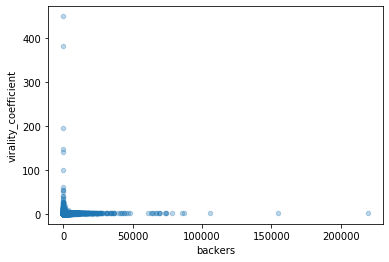

In [335]:
dataset_joined.plot(kind='scatter', x='backers', y='virality_coefficient', alpha=0.3)

Las variables 'virality_coefficient' y 'pledged_EUR' tampoco presentan una relación lineal.
Ambas variables contienen algún valor muy disperso sospechoso de ser un outlier.

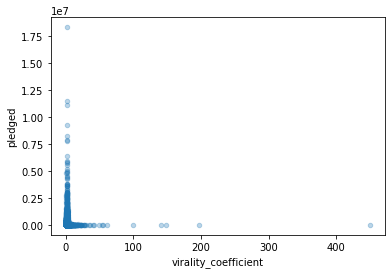

In [336]:
dataset_joined.plot(kind='scatter', x='virality_coefficient',y='pledged', alpha=0.3)

Las variables 'backers' y 'goal' no presentan una relación entre ellas. De forma que no se afectan una a la otra.
En ambas variables podemos observar la presencia de valores extremos.

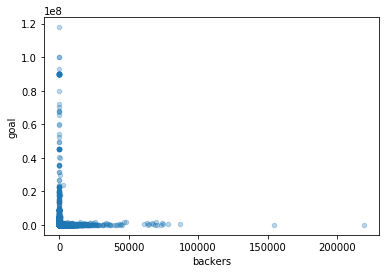

In [337]:
dataset_joined.plot(kind='scatter', x='backers',y='goal', alpha=0.3)

## Valores Nulos

In [338]:
dataset_joined.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
0,1276758370,Representante de Jugadores,Mobile Games,Games,EUR,2016-05-04,6000.0,2016-04-04 17:50:05,2.00,failed,2.0,ES,0.856671,1.00
1,720658440,Manic Expression,Indie Rock,Music,USD,2014-11-03,13500.0,2014-10-05 16:38:53,15129.00,successful,89.0,US,1.168227,0.90
2,1515077474,IMPULSION Watches: Where innovation meets time,Product Design,Design,CAD,2017-10-18,23800.0,2017-09-13 18:50:37,1459.28,failed,14.0,CA,0.944026,0.68
3,562858107,Let's take back the music industry!,Jazz,Music,USD,2010-03-05,4500.0,2010-01-05 22:53:18,22.50,failed,1.0,US,0.507137,0.90
4,619208385,8 to 5 Cable: a comedy webseries (Canceled),Webseries,Film & Video,USD,2012-10-05,5220.0,2012-09-05 23:23:46,0.00,canceled,0.0,US,0.716406,0.90


Examinamos columnas que contienen valores perdidos

In [366]:
null_columns=dataset_joined.columns[dataset_joined.isnull().any()]
null_columns

Index(['name', 'goal', 'pledged', 'backers', 'virality_coefficient'], dtype='object')

Observamos que hay 70515 filas con al menos un valor nulo

In [369]:
dataset_joined[pd.isnull(dataset_joined).any(axis=1)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
7,854828138,DON`T KILL THE OCTOPUS - first studio album - ...,Indie Rock,Music,EUR,2017-02-11,400.0,2017-01-15 14:50:42,20.0,failed,NaN,DE,NaN,1.00
13,1792339899,Lonesome Road CD,Country & Folk,Music,USD,2016-04-17,NaN,2016-03-18 16:32:09,94.5,failed,5.0,US,0.587974,0.90
14,1502830383,Under the Hood,Film & Video,Film & Video,USD,2014-09-28,NaN,2014-09-17 22:34:08,0.0,undefined,0.0,"N,0""",0.716406,0.90
18,1968592937,"""THE TALENT"" A Film by Edward James Anderson (...",Shorts,Film & Video,USD,2010-12-01,9000.0,2010-10-01 19:35:52,NaN,canceled,15.0,US,0.855976,0.90
24,1613612273,kurrupted clothing company,Apparel,Fashion,USD,2015-11-04,9000.0,2015-10-05 20:47:39,0.0,failed,NaN,US,NaN,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378750,506665580,Castles & Crusades Monsters & Treasure of Aihrde,Tabletop Games,Games,USD,2016-05-11,2250.0,2016-04-29 21:11:02,NaN,successful,225.0,US,0.870510,0.90
378756,471723980,1-10V Ardunio UNO shield,DIY Electronics,Technology,SEK,2017-04-06,NaN,2017-03-07 06:43:42,0.0,failed,0.0,SE,0.716406,0.09
378759,321620932,Backdoor Utah (Canceled),Nature,Photography,USD,2014-06-07,13725.0,2014-05-08 04:37:35,4.5,canceled,NaN,US,NaN,0.90
378761,1576791165,caribbean DJ,Electronic Music,Music,CAD,2014-09-11,NaN,2014-08-12 03:11:44,0.0,failed,0.0,CA,0.716406,0.68


Existen 4 proyectos para los cuales el nombre es nulo.

In [368]:
dataset_joined[dataset_joined['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
9809,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,180000.0,2012-01-01 12:35:31,90.00,failed,1.0,US,0.975937,0.90
72172,796533179,NaN,Painting,Art,USD,2011-12-05,NaN,2011-11-06 23:55:55,198.00,failed,5.0,US,0.791376,0.90
321312,634871725,NaN,Video Games,Games,GBP,2013-01-06,2380.0,2012-12-19 23:57:48,233.24,failed,12.0,GB,0.854747,1.19
338431,648853978,NaN,Product Design,Design,USD,2016-07-18,2250.0,2016-06-18 05:01:47,0.00,suspended,0.0,US,0.716406,0.90


Existen 26749 proyectos para los cuales el 'virality_coefficient'es nulo.

In [372]:
dataset_joined[dataset_joined['virality_coefficient'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
7,854828138,DON`T KILL THE OCTOPUS - first studio album - ...,Indie Rock,Music,EUR,2017-02-11,400.0,2017-01-15 14:50:42,20.00,failed,NaN,DE,NaN,1.00
24,1613612273,kurrupted clothing company,Apparel,Fashion,USD,2015-11-04,9000.0,2015-10-05 20:47:39,0.00,failed,NaN,US,NaN,0.90
29,764643039,Skill Fighters,Video Games,Games,CHF,2016-05-07,4650.0,2016-04-23 00:09:00,2.79,failed,NaN,CH,NaN,0.93
34,1434667564,Bob Yonker's Second CD,Music,Music,USD,2012-03-20,1800.0,2012-02-05 20:46:48,1890.00,successful,NaN,US,NaN,0.90
38,692636020,"The Urban Poser: A Gluten, Grain and Casein Fr...",Nonfiction,Publishing,USD,2013-08-24,9000.0,2013-08-07 16:26:05,14759.10,successful,NaN,US,NaN,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378702,965443160,BRIEFLIES DISSOLVING UNDERWEAR (Canceled),Apparel,Fashion,USD,2014-08-29,NaN,2014-07-30 19:11:09,23.40,canceled,NaN,US,NaN,0.90
378710,2133927872,'LANDMARK' - Limited Edition landscape photogr...,Photography,Photography,GBP,2014-05-12,7140.0,2014-04-22 10:49:22,374.85,canceled,NaN,GB,NaN,1.19
378747,668520908,Painting Canals of Western Europe,Painting,Art,USD,2017-08-21,2250.0,2017-07-22 22:11:43,2317.50,successful,NaN,US,NaN,0.90
378749,764962340,An American Search Alternative to Google (Canc...,Software,Technology,USD,2012-06-02,90000.0,2012-04-03 20:05:46,242.10,canceled,NaN,US,NaN,0.90


### Imputación de valores

Variable 'pledged_EUR' y 'goal_EUR' los imputamos con los valores de la mediana agrupados por 'currency'.


In [373]:
dataset_joined['pledged'] = dataset_joined['pledged'].fillna(dataset_joined.groupby('currency')['pledged'].transform('median'))

In [374]:
dataset_joined['goal'] = dataset_joined['goal'].fillna(dataset_joined.groupby('currency')['goal'].transform('median'))

Imputamos la variable 'backers' con la mediana agrupado por currency. 

In [375]:
dataset_joined['backers'] = dataset_joined['backers'].fillna(dataset_joined.groupby('currency')['backers'].transform('median'))

imputamos la variable 'virality_coefficient' por 'currency'.

In [376]:
dataset_joined['virality_coefficient'] = dataset_joined['virality_coefficient'].fillna(dataset_joined.groupby('currency')['virality_coefficient'].transform('median'))

Eliminamos la variable name del modelo ya que no aporta información relevante.

In [377]:
del dataset_joined['name']

## Outliers

Se observa como las variables 'goal' y 'pledged' presentan valores extremos que analizaremos a continuación para 
saber si deberían tratarse como outliers y en ese caso establecer un método para eliminarlos.

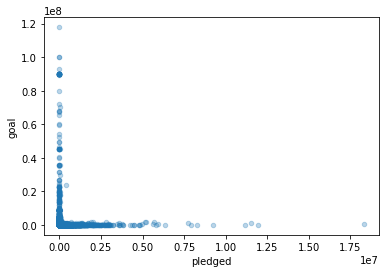

In [378]:
dataset_joined.plot(kind='scatter', x='pledged',y='goal', alpha=0.3)

### Analizamos valores extremos

###### Calculamos los outliers para la variable 'pledged_EUR'.

Profundizamos en el reconocimiento de los outliers a través de la visualización de un boxplot. Aquellos valores extremos serán representados como puntos en el diagrama.

A través de la gráfica observamos ciertos valores que se encuentran muy separados del resto de valores, de forma
que podríamos prescindir de ellos ya que contamiman el modelo. Aquellos valores que se encuentran por encima de los 10 millones, son valores aislados y poco representativos.

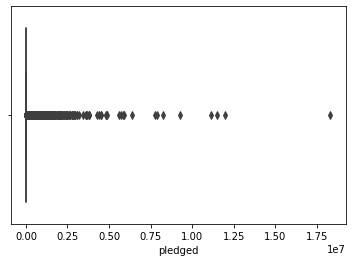

In [40]:
sns.boxplot(x=dataset_joined['pledged'])

Al analizar los valores superiores a 10,000,000 encontramos que se trata de proyectos con un goal relativamente
pequeño en comparación con la inversión que se ha realizado en ellos.
En general, los valores de la variable pledged_EUR en estos campos presentan valores demasiado elevados que no representan a la población mayoritaria de proyectos.


In [379]:
dataset_joined[dataset_joined['pledged'] >= 10000000]

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
180352,545070200,Tabletop Games,Games,USD,2017-01-08,90000.0,2016-11-25 06:01:41,1.115383e+07,successful,19264.0,US,1.166065,0.9
213504,2103598555,Product Design,Design,USD,2016-06-30,900000.0,2016-05-24 15:49:52,1.150186e+07,successful,66673.0,US,2.095041,0.9
233300,342886736,Product Design,Design,USD,2014-08-30,45000.0,2014-07-08 10:14:37,1.195670e+07,successful,13.0,US,0.888825,0.9
359778,1799979574,Product Design,Design,USD,2015-03-28,450000.0,2015-02-24 15:44:42,1.830509e+07,successful,78471.0,US,1.466498,0.9


## Análisis de outliers a través de Z-score

Con el cálculo de Z-score se reescalan los datos y se centran de forma que aquello valores que se encuentren lejos de 0 serán considerados outliers.

In [380]:
header = list(dataset_joined.loc[:,('pledged', 'goal', 'backers', 'virality_coefficient')])

In [381]:
for feature in header:
    z=stats.zscore(dataset_joined[feature])
    print('feature: ' + feature + '. Max z-score: ' + str(z.max()) + '. Min z-score: ' + str(z.min()))
              

feature: pledged. Max z-score: 225.42942458920584. Min z-score: -0.09696928404515107
feature: goal. Max z-score: 124.56696440534623. Min z-score: -0.038405050105502506
feature: backers. Max z-score: 249.2139422893268. Min z-score: -0.11287204249178319
feature: virality_coefficient. Max z-score: 391.0063140742496. Min z-score: -0.8073790629621851


In [382]:
# Vamos a investigar la distribución de la feature 'pledged' que presenta un valor muy elevado de  225
z = stats.zscore(dataset_joined['pledged'])

In [383]:
dataset_joined.iloc[np.where(z > 100)]

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
138791,565687737,Product Design,Design,USD,2015-09-03,18000.0,2015-07-07 13:52:34,8.272850e+06,successful,44949.0,US,1.795872,0.9
180352,545070200,Tabletop Games,Games,USD,2017-01-08,90000.0,2016-11-25 06:01:41,1.115383e+07,successful,19264.0,US,1.166065,0.9
213504,2103598555,Product Design,Design,USD,2016-06-30,900000.0,2016-05-24 15:49:52,1.150186e+07,successful,66673.0,US,2.095041,0.9
231175,506924864,Product Design,Design,USD,2012-05-19,90000.0,2012-04-11 06:59:04,9.240161e+06,successful,68929.0,US,1.450351,0.9
233300,342886736,Product Design,Design,USD,2014-08-30,45000.0,2014-07-08 10:14:37,1.195670e+07,successful,13.0,US,0.888825,0.9
359778,1799979574,Product Design,Design,USD,2015-03-28,450000.0,2015-02-24 15:44:42,1.830509e+07,successful,78471.0,US,1.466498,0.9


##### Calculamos los outliers para la variable 'goal_EUR'.

Profundizamos en el reconocimiento de los outliers a través de la visualización de un boxplot. 
Aquellos valores extremos serán representados como puntos en el diagrama.

A través de la gráfica observamos ciertos valores que se encuentran muy separados del resto de valores, de forma
que podríamos prescindir de ellos ya que contamiman el modelo. 
Aquellos valores que se encuentran por encima de los 80 millones, son valores muy aislados y poco representativos.

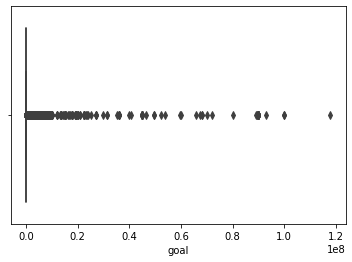

In [385]:
sns.boxplot(x=dataset_joined['goal'])

In [388]:
dataset_joined[dataset_joined['goal'] >= 80000000]

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
32021,1370542565,Art,Art,USD,2016-06-05,90000000.0,2016-04-06 02:55:07,103.5,failed,2.0,US,0.717185,0.90
34318,1119122774,Video,Journalism,USD,2017-01-21,90000000.0,2016-11-22 06:41:27,0.9,failed,1.0,US,0.525190,0.90
44095,941328479,Movie Theaters,Film & Video,USD,2017-10-13,90000000.0,2017-08-14 16:45:32,0.0,failed,0.0,US,0.716406,0.90
45178,2137925650,Science Fiction,Film & Video,USD,2016-10-10,90000000.0,2016-08-11 12:21:47,0.0,canceled,0.0,US,0.716406,0.90
67191,1279992058,Video Games,Games,USD,2016-01-01,90000000.0,2015-11-07 00:57:17,11.7,failed,4.0,US,0.931324,0.90
67633,601594365,Architecture,Design,USD,2015-03-02,90000000.0,2015-01-07 19:11:05,0.9,canceled,1.0,US,0.763490,0.90
89593,944541075,Technology,Technology,EUR,2015-10-24,100000000.0,2015-08-25 23:52:30,2.0,failed,2.0,FR,0.806268,1.00
97186,219702078,Restaurants,Food,CHF,2015-10-05,93000000.0,2015-08-06 19:12:10,0.0,failed,0.0,CH,0.716406,0.93
117338,1168153740,Fantasy,Film & Video,USD,2017-01-14,90000000.0,2016-12-15 02:24:14,0.0,failed,0.0,US,0.716406,0.90
123790,1933151256,Apps,Technology,EUR,2015-06-30,80000000.0,2015-06-15 11:40:42,1.0,canceled,1.0,NL,0.460935,1.00


Investigamos la distribución de la feature 'goal' que presenta un valor muy elevado de 124

In [389]:
z = stats.zscore(dataset_joined['goal'])

In [312]:
dataset_joined.iloc[np.where(z > 90)]

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
364138,2094346154,Technology,Technology,USD,2015-08-01,90000000.0,2015-06-02 19:21:34,0.0,failed,0.0,US,0.716406,0.90
171935,1806062709,Shorts,Film & Video,USD,2014-05-09,90000000.0,2014-04-09 18:59:51,0.9,failed,1.0,US,0.835456,0.90
170346,499583381,Horror,Film & Video,USD,2015-08-22,90000000.0,2015-07-23 21:44:02,0.9,failed,1.0,US,0.410267,0.90
117338,1168153740,Fantasy,Film & Video,USD,2017-01-14,90000000.0,2016-12-15 02:24:14,0.0,failed,0.0,US,0.716406,0.90
349888,1321011533,Thrillers,Film & Video,USD,2018-01-03,89100000.0,2017-11-24 19:46:19,0.0,live,0.0,US,0.716406,0.90
32021,1370542565,Art,Art,USD,2016-06-05,90000000.0,2016-04-06 02:55:07,103.5,failed,2.0,US,0.717185,0.90
277280,208731425,Painting,Art,USD,2017-11-09,90000000.0,2017-09-10 17:54:05,53.1,failed,2.0,US,0.863611,0.90
89593,944541075,Technology,Technology,EUR,2015-10-24,100000000.0,2015-08-25 23:52:30,2.0,failed,2.0,FR,0.806268,1.00
281390,1395179504,Technology,Technology,USD,2016-04-01,90000000.0,2016-02-01 13:39:08,1.8,failed,2.0,US,0.689023,0.90
352698,1371612630,Documentary,Film & Video,USD,2014-12-17,90000000.0,2014-12-16 15:43:58,0.0,failed,0.0,US,0.716406,0.90


# IQR para detección de outliers

##### Calculamos el rango IQR para la variable 'pledged'

A través del cálculo de la skewness que tiene un valor de 83.79 vemos que se trata de una variable con outliers muy extremos. De forma que a través del rango intercuartílico procederemos a analizarlos y eliminarlos del dataset.

In [390]:
print(dataset_joined["pledged"].skew())
dataset_joined["pledged"].describe()

83.79711975632534


count    3.787630e+05
mean     7.870614e+03
std      8.116616e+04
min      0.000000e+00
25%      3.150000e+01
50%      5.950000e+02
75%      3.381300e+03
max      1.830509e+07
Name: pledged, dtype: float64

In [391]:
IQR = dataset_joined["pledged"].quantile(0.75) - dataset_joined["pledged"].quantile(0.25)

In [397]:
# Calculamos el límite superior (normal y extremo)
limSup = dataset_joined["pledged"].quantile(0.75) + (IQR *  1.5)
limSupExt = dataset_joined["pledged"].quantile(0.75) + (IQR *  3)


In [398]:
# Total de observaciones
total = dataset_joined["pledged"].shape[0]

Examinamos el límite superior y vemos que el 13,5% de las observaciones se encuetran por encima del límite superior.

In [399]:
dataset_joined[dataset_joined["pledged"] > limSup].shape[0]/total

0.13486005760858374

Examinamos el límite superior y vemos que el 9% de las observaciones se encuetran por encima del límite superior extremo.

In [401]:
# Examinamos el límite superior extremo
dataset_joined[dataset_joined["pledged"] > limSupExt].shape[0]/total

0.09005367472535596

###### Calculamos el rango IQR para la variable 'goal'

A través del cálculo de la skewness que tiene un valor de 80.39 vemos que también se trata de una variable con outliers muy extremos.

In [402]:
print(dataset_joined["goal"].skew())
dataset_joined["goal"].describe()

80.39275595330439


count    3.787630e+05
mean     3.631063e+04
std      9.454661e+05
min      9.000000e-03
25%      2.112480e+03
50%      4.500000e+03
75%      1.350000e+04
max      1.178100e+08
Name: goal, dtype: float64

In [403]:
IQR = dataset_joined["goal"].quantile(0.75) - dataset_joined["goal"].quantile(0.25)

In [404]:
# Calculamos el límite superior (normal y extremo)
limSup = dataset_joined["goal"].quantile(0.75) + (IQR *  1.5)
limSupExt = dataset_joined["goal"].quantile(0.75) + (IQR *  3)

In [405]:
# Total de observaciones
total = dataset_joined["goal"].shape[0]

Examinamos el límite superior y vemos que el 11,4% de las observaciones se encuetran por encima del límite superior.

In [406]:
dataset_joined[dataset_joined["goal"] > limSup].shape[0]/total

0.11368586688773719

Examinamos el límite superior y vemos que el 6,6% de las observaciones se encuetran por encima del límite superior extremo.

In [407]:
# Examinamos el límite superior extremo
dataset_joined[dataset_joined["goal"] > limSupExt].shape[0]/total

0.06644524412363403

#### Eliminamos conjuntamente outliers en la variable 'pledge' y 'goal'

In [408]:
dataset_cleaned = dataset_joined.copy()

In [409]:
Q1 = dataset_cleaned.quantile(0.25)
Q3 = dataset_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                      1.072195e+09
goal                    1.138752e+04
pledged                 3.349800e+03
backers                 4.800000e+01
virality_coefficient    3.355895e-01
exchange_rate           0.000000e+00
dtype: float64


A través de la eliminación de los outliers el tamaño del dataset se reduce a las dimensiones de 337508 filas con 13 columnas, lo que supone alrededor de un 10% de los datos que teníamos.

In [411]:
dataset_cleaned = dataset_cleaned[~((dataset_cleaned.loc[:, ('pledged', 'goal')] < (Q1 - 4.5 * IQR)) |(dataset_cleaned.loc[:, ('pledged', 'goal')] > (Q3 + 4.5 * IQR))).any(axis=1)]
print(dataset_cleaned.shape)

(337508, 13)


Tras eliminar los outliers, calculamos de nuevo la skewness para ambas variables.
Se observa para ambas variables una clara disminución del valor de la skewness, situándose en 2,34 para la variable 'pledged' y 2,54 para la variable 'goal'.

In [412]:
print(dataset_cleaned["pledged"].skew())
dataset_cleaned["pledged"].describe()

2.3474321292514944


count    337508.000000
mean       2071.827246
std        3476.765570
min           0.000000
25%          27.000000
50%         472.500000
75%        2470.500000
max       18454.752000
Name: pledged, dtype: float64

In [413]:
print(dataset_cleaned["goal"].skew())
dataset_cleaned["goal"].describe()

2.5411639687025844


count    337508.000000
mean       8045.195106
std       10703.302867
min           0.009000
25%        1800.000000
50%        4500.000000
75%        9000.000000
max       64665.900000
Name: goal, dtype: float64

Tras visualizar el histograma de ambas variables para ver el cambio que se ha producido en la distribución al eliminar los outliers, se observa como la distribución aunque sigue siendo muy poco simétrica se ha relajado al prescindir de esos valores tan extremos.

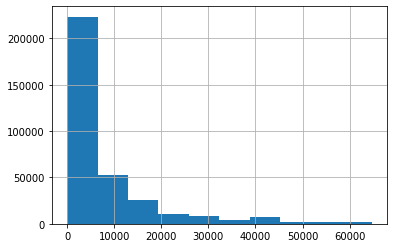

In [414]:
dataset_cleaned['goal'].hist()

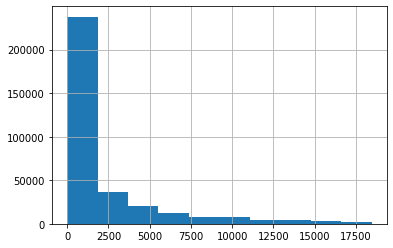

In [417]:
dataset_cleaned['pledged'].hist()

Analizamos la variable ' backers' ya que contenía un z-score muy elevado de 249. Tras realizar la limpieza de outliers vemos como el valor de la skewness para esta variable se ha relajado.
Puede observarse como hay 4 valores muy dispersos que destacan del resto de puntos. 
Tras visualizar los datos junto con el resto de variables, vemos que en estos casos en donde hay un número elevado de 'backers' el proyecto ha resultado exitoso, de forma que podemos considerar dejar estos valores.

In [418]:
print(dataset_cleaned["backers"].skew())
dataset_cleaned["backers"].describe()

40.67547928693528


count    337508.000000
mean         37.097287
std          95.596311
min           0.000000
25%           2.000000
50%          12.000000
75%          39.000000
max       16077.000000
Name: backers, dtype: float64

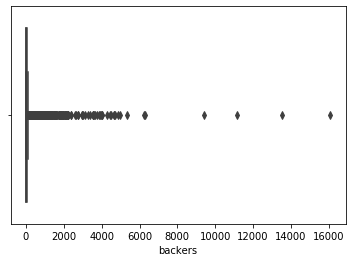

In [419]:
sns.boxplot(x=dataset_cleaned['backers'])

In [420]:
dataset_cleaned[dataset_cleaned['backers']>8000]

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
34894,1101572780,DIY Electronics,Technology,USD,2012-06-13,22500.0,2012-05-14 06:45:06,652.5,successful,11124.0,US,1.112305,0.9
39310,632311551,Design,Design,EUR,2017-11-19,20000.0,2017-10-19 00:51:24,200.0,successful,16077.0,NL,1.494712,1.0
104797,1596681376,Sculpture,Art,USD,2017-03-15,34200.0,2017-02-13 19:37:06,652.5,successful,9417.0,US,3.040896,0.9
151220,195314440,Product Design,Design,USD,2010-12-17,13500.0,2010-11-17 05:02:14,652.5,successful,13512.0,US,2.006803,0.9


La variable 'virality_coefficient' tiene un z-score de 360,48, de forma que procedemos a analizarla.
Observamos que tambien contiene valores muy dispersos y extremos.

In [422]:
print(dataset_cleaned["virality_coefficient"].skew())
dataset_cleaned["virality_coefficient"].describe()

272.79309751894095


count    337508.000000
mean          0.910996
std           1.205450
min           0.000000
25%           0.716406
50%           0.880990
75%           1.030483
max         449.928043
Name: virality_coefficient, dtype: float64

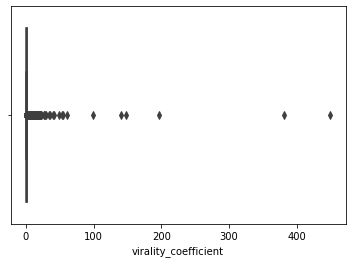

In [424]:
sns.boxplot(x=dataset_cleaned['virality_coefficient'])

In [426]:
dataset_cleaned[dataset_cleaned['virality_coefficient']>150]

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,virality_coefficient,exchange_rate
102508,1902105444,Printing,Crafts,DKK,2016-06-24,260.0,2016-05-25 12:27:07,328.25,successful,20.0,DK,381.943738,0.13
171388,1292174685,Children's Books,Publishing,USD,2016-12-19,2700.0,2016-11-19 17:15:24,126.90,failed,5.0,US,196.383685,0.90
274339,355433650,Apparel,Fashion,EUR,2016-06-06,9500.0,2016-04-07 19:58:24,1293.00,canceled,25.0,IT,449.928043,1.00


## Correlaciones

Se observa que no existe una correlación importante entre ninguna de las variables.
Destacamos que la variable 'backers' tiene una correlación de 0,51 con la variable ' pledged' como señalamos en el scatter plot anterior donde pudimos visualizar una cierta correlación entre ambas variables.

In [428]:
corr_matrix = dataset_cleaned.corr()

In [429]:
corr_matrix

,ID,goal,pledged,backers,virality_coefficient,exchange_rate
ID,1.000000,-0.001059,-0.001288,-0.001198,-0.000412,-0.002250
goal,-0.001059,1.000000,0.087453,0.015890,-0.002429,0.004520
pledged,-0.001288,0.087453,1.000000,0.503635,0.079317,0.010946
backers,-0.001198,0.015890,0.503635,1.000000,0.065880,0.004309
virality_coefficient,-0.000412,-0.002429,0.079317,0.065880,1.000000,-0.002092
exchange_rate,-0.002250,0.004520,0.010946,0.004309,-0.002092,1.000000


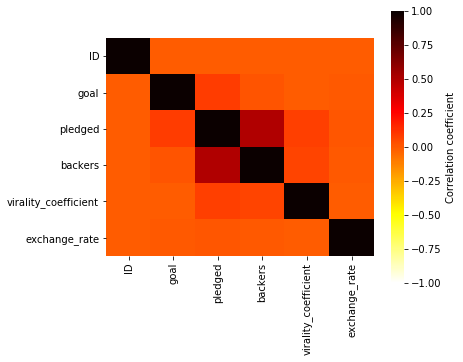

In [430]:
sns.heatmap(corr_matrix, 
            cbar_kws={"label": "Correlation coefficient", "shrink": 1.25, "ticks": np.linspace(-1.0, 1.0, 9)}, 
            cmap=plt.cm.hot_r, 
            vmin=-1, vmax=1)
plt.show()

## Preparación de la variable Target

In [431]:
dataset_cleaned["Target"] = np.where(dataset_cleaned["state"].str.contains("successful"), 1, 0)

In [432]:
del dataset_cleaned['state']

## Encoding de las variables categóricas

In [80]:
dataset_cleaned.head()

,ID,category,main_category,currency,deadline,goal,launched,pledged,backers,country,virality_coefficient,exchange_rate,Target
175939,416402889,Food Trucks,Food,USD,2016-09-18,450.0,2016-09-08 19:44:07,450.9,4.0,US,0.740669,0.90,1
142439,1564077346,Shorts,Film & Video,USD,2018-01-03,1800.0,2017-12-04 02:32:17,2052.0,13.0,US,0.889006,0.90,0
306830,1393891032,Film & Video,Film & Video,USD,2014-11-01,4860.0,2014-09-17 22:13:45,99.0,0.0,"N,0""",0.716406,0.90,0
194070,1482530382,Fine Art,Photography,MXN,2017-05-12,1880.0,2017-04-08 11:52:34,0.0,0.0,MX,0.716406,0.04,0
234299,690650161,Mobile Games,Games,USD,2017-10-13,900.0,2017-09-12 17:35:23,341.1,11.0,US,1.036291,0.90,0


In [433]:
dataset_cleaned_dummies= dataset_cleaned.copy()

In [434]:
dataset_cleaned_dummies.reset_index(drop=True, inplace=True)

In [436]:
dummies= dataset_cleaned_dummies.loc[:,('category', 'main_category','currency', 'country')]

In [437]:
encoder = OneHotEncoder()
dummies = encoder.fit_transform(dummies).toarray()
dummies.shape

(337508, 211)

In [438]:
#Creamos un Pandas DataFrame de las columnas encoded
dummies_encoded = pd.DataFrame(dummies, columns=encoder.get_feature_names())

In [439]:
dummies_encoded.shape

(337508, 211)

In [442]:
dataset_final = pd.concat([dataset_cleaned_dummies, dummies_encoded], axis=1)

In [443]:
dataset_final.shape

(337508, 224)

## Sacamos nuevas variables de las variables 'deadline' y 'launched'

Obtenemos el mes en el que el proyecto fué lanzado

In [444]:
dataset_final['month_launched'] = dataset_final['launched'].dt.month

Obtenemos el dia de la semana en el que el proyecto fué lanzado

In [445]:
dataset_final['day_of_week_launched'] = dataset_final['launched'].dt.dayofweek

Obtenemos día del mes en el que el proyecto se lanzó

In [446]:
dataset_final['day_of_month_launched'] = dataset_final['launched'].dt.day

Obtenemos el mes en el que el proyecto se cerró

In [447]:
dataset_final['month_deadline'] = dataset_final['deadline'].dt.month

Obtenemos día del mes en el que el proyectó finalizó

In [448]:
dataset_final['day_of_month_deadline'] = dataset_final['deadline'].dt.day

Obtenemos la diferencia entre la 'launched' y 'deadline'

In [449]:
dataset_final['diff_fechas'] = (dataset_final['deadline'] - dataset_final['launched']).dt.days

## Generamos el archivo csv.

In [451]:
filename= 'dataset_kickstarter_ml.csv'

In [452]:
dataset_final.to_csv(filename, index=False, sep=';', encoding='utf-8')